# IS 362 Week 14 Project 5
## By Alexander Doler and Jake Kwok

In [230]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn, sklearn.model_selection, sklearn.linear_model
%matplotlib inline

mushroomData = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',sep=',', header=None, usecols=[0,5,9,22], names=["Edibility","Odor","Color","Habitat"])
mushroomData 

,Edibility,Odor,Color,Habitat
0,p,p,k,u
1,e,a,k,g
2,e,l,n,m
3,p,p,n,u
4,e,n,k,g
5,e,a,n,g
6,e,a,g,m
7,e,l,n,m
8,p,p,p,g
9,e,a,g,m


In [231]:
columns = [mushroomData.Edibility,mushroomData.Odor,mushroomData.Color,mushroomData.Habitat]
columnNames = ["Edibility","Odor","Color","Habitat"]
transDict = {}
counter = 0
columnCounter = 0
columnNamesCounter = 0
mushroomDataNums = pd.DataFrame()

for n in range(4):
    for letter in columns[columnCounter]:
        if letter not in transDict:
            transDict[letter] = counter
            counter += 1

    oldValues = list(transDict.keys())
    newValues = list(transDict.values())
    
    mushroomDataNums[columnCounter] = mushroomData[[columnNamesCounter]].replace(oldValues,newValues)
    
    columnCounter += 1
    columnNamesCounter += 1
    counter = 0
    transDict = {}
    
mushroomDataNums.columns = columnNames
mushroomDataNums

,Edibility,Odor,Color,Habitat
0,0,0,0,0
1,1,1,0,1
2,1,2,1,2
3,0,0,1,0
4,1,3,0,1
5,1,1,1,1
6,1,1,2,2
7,1,2,1,2
8,0,0,3,1
9,1,1,2,2


### In this cell we use the pandas "get_dummies" method, which sets a column for each unique element in the dataset column, indicating whether a row contains the value via boolean 1's and 0's.

In [232]:
odor = pd.Series(mushroomData['Odor'])
color = pd.Series(mushroomData['Color'])
habitat = pd.Series(mushroomData['Habitat'])
c = pd.get_dummies(color)
o = pd.get_dummies(odor)
h = pd.get_dummies(habitat)



### In the following three cells, we prepare the data for linear regression analysis. We then zip the results into a new dataset in order to see the coefficient for each element in each of the three columns other than edibility.

In [233]:
mushroomColor = pd.concat([c, mushroomData['Edibility']], axis=1)

cols = list(mushroomColor.iloc[:, :-1])
XColor = mushroomColor.iloc[:, :-1].values
YColor = mushroomColor.iloc[:, 1].values

X_train_color, X_test_color, Y_train_color, Y_test_color = sklearn.model_selection.train_test_split(XColor, YColor, random_state=1)

linregColor = sklearn.linear_model.LinearRegression()
linregColor.fit(X_train_color, Y_train_color)
Y_pred_color = linregColor.predict(X_test_color)
tColor = [1, 0]
pColor = [1, 0]

#print(sklearn.metrics.mean_absolute_error(tColor, pColor))

pd.DataFrame(list(zip(mushroomColor.columns,linregColor.coef_)), columns=["Color type","Coefficient"])

,Color type,Coefficient
0,b,-0.008851
1,e,0.991149
2,g,-0.008851
3,h,-0.008851
4,k,-0.008851
5,n,-0.008851
6,o,-0.008851
7,p,-0.008851
8,r,-0.008851
9,u,-0.008851


In [234]:
mushroomOdor = pd.concat([o, mushroomData['Edibility']], axis=1)

cols = list(mushroomOdor.iloc[:, :-1])
XOdor = mushroomOdor.iloc[:, :-1].values
YOdor = mushroomOdor.iloc[:, 1].values

X_train_odor, X_test_odor, Y_train_odor, Y_test_odor = sklearn.model_selection.train_test_split(XOdor, YOdor, random_state=1)

linregOdor = sklearn.linear_model.LinearRegression()
linregOdor.fit(X_train_odor, Y_train_odor)
Y_pred_odor = linregOdor.predict(X_test_odor)
tOdor = [1, 0]
pOdor = [1, 0]

print(sklearn.metrics.mean_absolute_error(tOdor, pOdor))

pd.DataFrame(list(zip(mushroomOdor.columns,linregOdor.coef_)), columns=["Odor type","Coefficient"])


0.0


,Odor type,Coefficient
0,a,-0.059426
1,c,0.940574
2,f,-0.059426
3,l,-0.059426
4,m,-0.059426
5,n,-0.059426
6,p,-0.059426
7,s,-0.059426
8,y,-0.059426


In [235]:
mushroomHabitat = pd.concat([h, mushroomData['Edibility']], axis=1)

cols = list(mushroomColor.iloc[:, :-1])
XHabitat = mushroomHabitat.iloc[:, :-1].values
YHabitat = mushroomHabitat.iloc[:, 1].values

X_train_habitat, X_test_habitat, Y_train_habitat, Y_test_habitat = sklearn.model_selection.train_test_split(XHabitat, YHabitat, random_state=1)

linregHabitat = sklearn.linear_model.LinearRegression()
linregHabitat.fit(X_train_habitat, Y_train_habitat)
Y_pred_habitat = linregHabitat.predict(X_test_habitat)
tHabitat = [1, 0]
pHabitat = [1, 0]

print(sklearn.metrics.mean_absolute_error(tHabitat, pHabitat))

pd.DataFrame(list(zip(mushroomHabitat.columns,linregHabitat.coef_)), columns=["Habitat type","Coefficient"])

0.0


,Habitat type,Coefficient
0,d,-0.093266
1,g,0.906734
2,l,-0.093266
3,m,-0.093266
4,p,-0.093266
5,u,-0.093266
6,w,-0.093266


### In each of the coefficient datasets, there is one element that seems to stand out by having a higher, positive number than the rest of the numbers. However, all of the numbers tend to remain close to 0, indicating little overall variation and no clear tendencies.

#### - In the Color column the "e" element, which stands for red color, stands out as tending to be more poisenous.
#### - In the Odor column, the "e" element, which stands for creotosote, stands out as as tending to be more poisenous.
#### - In the Habitat column, the "g" element, which stands for grasses, stands out as the tending to be more poisenous.


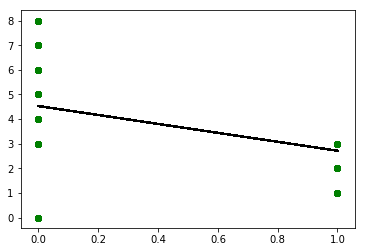

In [236]:
# for the "Mushroomdata"
X = mushroomDataNums['Edibility'].values[:,np.newaxis]
# target data is array of shape (n,) 
y = mushroomDataNums['Odor'].values

linregOdor.fit(X, y)

plt.scatter(X, y,color='g')
plt.plot(X, linregOdor.predict(X),color='k')

plt.show()

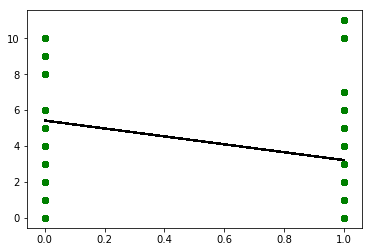

In [237]:
# for the "Mushroomdata"
X = mushroomDataNums['Edibility'].values[:,np.newaxis]
# target data is array of shape (n,) 
y = mushroomDataNums['Color'].values

linregOdor.fit(X, y)

plt.scatter(X, y,color='g')
plt.plot(X, linregOdor.predict(X),color='k')

plt.show()

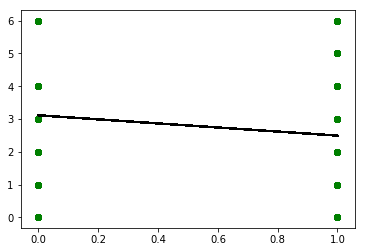

In [238]:

# for the "Mushroomdata"
X = mushroomDataNums['Edibility'].values[:,np.newaxis]
# target data is array of shape (n,) 
y = mushroomDataNums['Habitat'].values

linregOdor.fit(X, y)

plt.scatter(X, y,color='g')
plt.plot(X, linregOdor.predict(X),color='k')

plt.show()

### *In conclusion*

#### We used the sklearn.LinearRegression.fit to take takes two arguments. First the "Color", which should be a 2D array, and second the "target values". In the case considered here, we simply what to make a fit, so we do not care about the notions too much, but we need to bring the first input to that function into the desired shape. This can be easily done by creating a new axis to one of the arrays, i.e. mushroomDatanums['edibility'].values[:,np.newaxis]

#### Also depending on the graphs we can see the edibility between habitat, odor, and color.